<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/bigdataHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
import time
from google.colab import files
import os
import torch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FixedLocator, FormatStrFormatter
import pandas as pd

In [121]:
def Normalization_(vectorP3): # vector (x,y,z)
  noC=1/sqrt(vectorP3[0]**2+vectorP3[1]**2+vectorP3[2]**2)
  return [noC*vectorP3[0],noC*vectorP3[1],noC*vectorP3[2]]

def vector_CtoS(vectorP3_C0):
  r=sqrt(vectorP3_C0[0]**2+vectorP3_C0[1]**2+vectorP3_C0[2]**2)
  theta=acos(vectorP3_C0[2]/r)
  phi=acos(vectorP3_C0[0]/r)
  return [r,theta,phi]

def vector_StoC(vectorP3_S0):
  xx = vectorP3_S0[0]*sin(vectorP3_S0[1])*cos(vectorP3_S0[2])
  yy = vectorP3_S0[0]*sin(vectorP3_S0[1])*sin(vectorP3_S0[2])
  zz = vectorP3_S0[0]*cos(vectorP3_S0[1])
  #print([xx,yy,zz])
  return [xx,yy,zz]

def Potential_C(vectorP3_C):
  k_C=1
  vectorP3_S=vector_CtoS(vectorP3_C)
  return k_C*vectorP3_S[0]**2

def Potential_S(vectorP3_S):
  k_S=1
  return k_S*vectorP3_S[0]**2

In [122]:
random.random()

0.3786640112498004

In [123]:
def E_field_(fnc_,vectorP3_C): # function , vector (x,y,z)
  ds = 0.001
  poten0=Potential_C(vectorP3_C)
  dpoten=0
  global dvector
  for i in range(10000):
    r_rnd = ds
    theta_rnd = pi*random.random()
    phi_rnd = 2*pi*random.random()
    vectorRnd = vector_StoC([r_rnd,theta_rnd,phi_rnd])
    poten1=Potential_C([vectorP3_C[0]+vectorRnd[0],vectorP3_C[1]+vectorRnd[1],vectorP3_C[2]+vectorRnd[2]])
    if dpoten>(poten1-poten0):
      dpoten=(poten1-poten0)
      dvector=[r_rnd,theta_rnd,phi_rnd]
    #print("dddddddddddddd")
    #print(dvector)
    dvector_c=vector_StoC(dvector)
  vectorE_unit=Normalization_(dvector_c)
  vectorE3_C=[(dpoten/ds)*-vectorE_unit[0],(dpoten/ds)*-vectorE_unit[1], (dpoten/ds)*-vectorE_unit[2]]
  return vectorE3_C
  

In [127]:
for q in range(1):
  print(E_field_(Potential_C,[3,10,-3]))

[-5.611406732975307, -19.98198924458024, 6.3939251745337895]


In [140]:
vectorP3_ini = [10,10,10]
vectorM3_ini = [3,9,14]  # initial_momentum
q = 1  # charge of pt.
mass = 1 # mass of particle
vectorP3_list = [vectorP3_ini]
vectorM3_list = [vectorM3_ini]
nExp = 3000
velocityP3 = [[vectorM3_ini[0]/mass, vectorM3_ini[1]/mass, vectorM3_ini[2]/mass ]]
accelP3=[[0,0,0]]
vectorVhf=[]
dt = 0.01
xlist=[vectorP3_list[0][0]]
ylist=[vectorP3_list[0][1]]
zlist=[vectorP3_list[0][2]]

for ii in range(nExp): 
  vectorE = E_field_(Potential_C,vectorP3_list[ii]) 
  accelP3.append([q/mass*vectorE[0], q/mass*vectorE[1], q/mass*vectorE[2]])
  vectorVhf.append([velocityP3[ii][0]+dt/2*accelP3[ii][0], velocityP3[ii][1]+dt/2*accelP3[ii][1], velocityP3[ii][2]+dt/2*accelP3[ii][2]])
  vectorP3_list.append([vectorP3_list[ii][0]+dt*vectorVhf[ii][0], vectorP3_list[ii][1]+dt*vectorVhf[ii][1], vectorP3_list[ii][2]+dt*vectorVhf[ii][2] ])
  velocityP3.append([vectorVhf[ii][0]+dt/2*accelP3[ii+1][0], vectorVhf[ii][1]+dt/2*accelP3[ii+1][1], vectorVhf[ii][2]+dt/2*accelP3[ii+1][2] ])
  xlist.append(vectorP3_list[ii+1][0])
  ylist.append(vectorP3_list[ii+1][1])
  zlist.append(vectorP3_list[ii+1][2])

In [141]:
xlist_np=np.array(xlist)
ylist_np=np.array(ylist)
zlist_np=np.array(zlist)

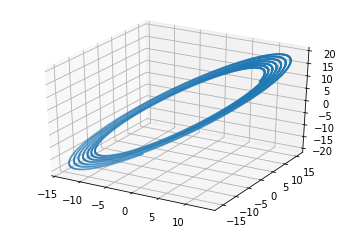

In [142]:
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xlist_np,ylist_np,zlist_np,s=1, cmap='rainbow')


plt.show()